In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# This line makes sure that plots appear directly in the notebook
%matplotlib inline

# Optional: Makes Plotly charts work offline in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

print("All libraries imported successfully!")

In [ ]:
# Load the dataset from the data folder
file_path = "data/netflix_titles.csv"
netflix_df = pd.read_csv(file_path)

# Display the first 5 rows of the dataframe to check if it loaded correctly
netflix_df.head()

In [4]:
# See how many rows and columns the dataset has
netflix_df.shape

(8807, 12)

In [5]:
# Get a quick overview of data types and non-null counts
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Show descriptive statistics for all columns
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
# Check for missing values in each column
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:

# Handle the missing values for 'director', 'cast', 'country' by filling with 'Unknown'
# We use the recommended method to avoid the warning: df[col] = df[col].method(value)
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')
netflix_df['country'] = netflix_df['country'].fillna('Unknown')

# Handle the few missing values in 'rating' and 'duration' by dropping those rows.
netflix_df = netflix_df.dropna(subset=['rating', 'duration'])

# Handle the 10 missing 'date_added' rows by dropping them.
netflix_df = netflix_df.dropna(subset=['date_added'])

# FIX: Clean the 'date_added' strings by stripping leading/trailing whitespace
netflix_df['date_added'] = netflix_df['date_added'].str.strip()

#  NOW Convert the cleaned 'date_added' column to a proper datetime format
# We use 'errors='coerce'' to be safe. It will turn any unparsable dates into NaT (Not a Time), which we can then check.
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', errors='coerce') # Using 'format='mixed'' to handle the variation

# Check if the conversion created any new missing values (NaT)
print("Missing values in 'date_added' after conversion:", netflix_df['date_added'].isnull().sum())

print("\nMissing values after all cleaning:")
print(netflix_df.isnull().sum())

# check the new data type for 'date_added'
print("\nData types after cleaning:")
print(netflix_df.dtypes)

# Check the new shape of the dataframe
print(f"\nThe cleaned dataset has: {netflix_df.shape[0]} rows and {netflix_df.shape[1]} columns")

Missing values in 'date_added' after conversion: 0

Missing values after all cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Data types after cleaning:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

The cleaned dataset has: 8790 rows and 12 columns


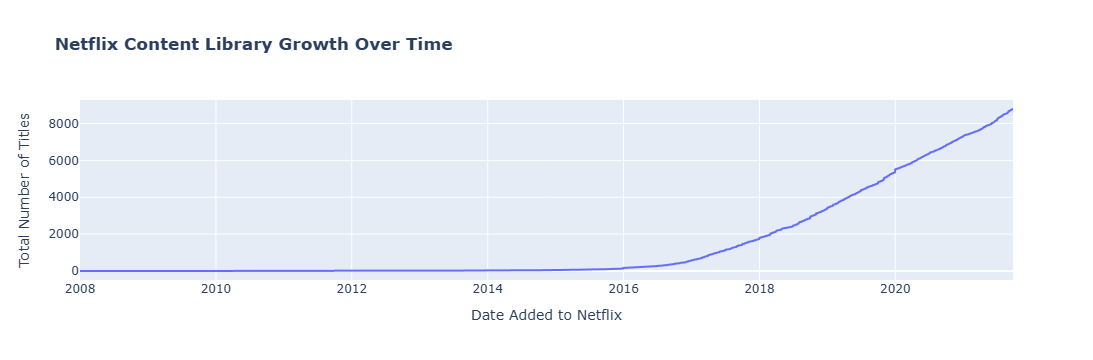

In [11]:
# Create a new dataframe that counts the number of titles added per month
timeline_df = netflix_df['date_added'].value_counts().reset_index()
timeline_df.columns = ['date_added', 'count']  # Rename columns
timeline_df = timeline_df.sort_values('date_added')  # Sort by date

# Create a cumulative sum to show the total library size over time
timeline_df['cumulative_count'] = timeline_df['count'].cumsum()

# Create the interactive plot
fig = px.line(timeline_df, x='date_added', y='cumulative_count',
              title='<b>Netflix Content Library Growth Over Time</b>',
              labels={'date_added': 'Date Added to Netflix', 'cumulative_count': 'Total Number of Titles'})
fig.show()

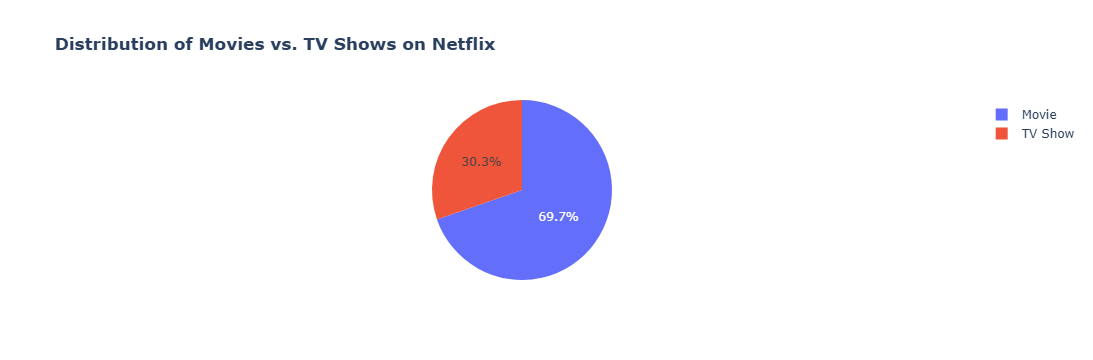

In [12]:
# Count the number of Movies vs. TV Shows
type_count = netflix_df['type'].value_counts()

# Create the interactive pie chart
fig = px.pie(values=type_count.values, names=type_count.index,
             title='<b>Distribution of Movies vs. TV Shows on Netflix</b>')
fig.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3056\1820853619.py:12: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



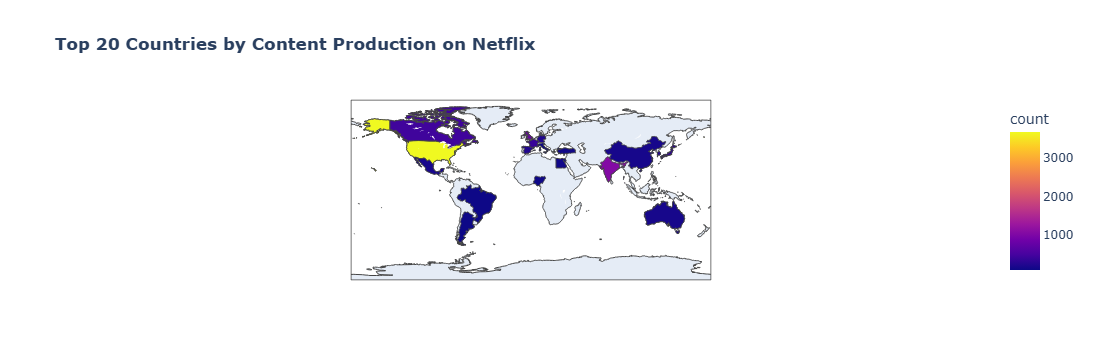

In [13]:
# We need to split the 'country' column as one show can have multiple countries
# We use .str.split(', ', expand=True) to split them into new rows
country_df = netflix_df['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('country')
# Now we can count the occurrences for each individual country
country_counts = country_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Filter for top N countries to make the map cleaner (e.g., top 20)
top_countries = country_counts.head(20)

# Create the choropleth map (world map)
fig = px.choropleth(top_countries,
                    locations="country", # Column with country names
                    locationmode='country names', # Plotly understands this
                    color="count", # Value defines the color intensity
                    title='<b>Top 20 Countries by Content Production on Netflix</b>',
                    hover_name="country", # What appears on hover
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

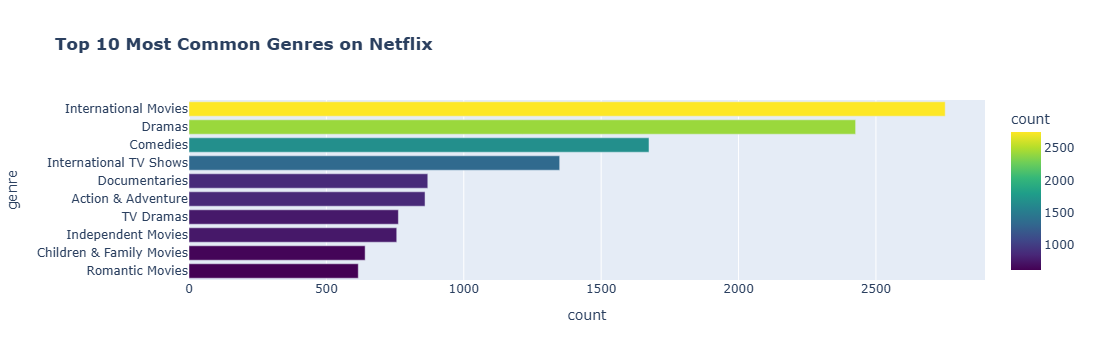

In [14]:
# Similar to countries, we need to split the 'listed_in' (genres) column
genre_df = netflix_df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
genre_counts = genre_df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Get the top 10 genres
top_genres = genre_counts.head(10)

# Create a horizontal bar chart for better readability
fig = px.bar(top_genres, y='genre', x='count', orientation='h',
             title='<b>Top 10 Most Common Genres on Netflix</b>',
             color='count', color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(yaxis={'categoryorder':'total ascending'}) # This sorts the bars
fig.show()

In [ ]:
# Save the charts as high-quality PNG images

# 1. Save the Growth Chart
fig = px.line(timeline_df, x='date_added', y='cumulative_count',
              title='<b>Netflix Content Library Growth Over Time</b>',
              labels={'date_added': 'Date Added to Netflix', 'cumulative_count': 'Total Number of Titles'})
fig.write_image("images/netflix_growth.png", width=1000, height=600, scale=2) # scale=2 makes it high-res

# 2. Save the Movie vs TV Show Chart
type_count = netflix_df['type'].value_counts()
fig = px.pie(values=type_count.values, names=type_count.index,
             title='<b>Distribution of Movies vs. TV Shows on Netflix</b>')
fig.write_image("images/movie_vs_tv.png", width=800, height=600, scale=2)

# 3. Save the Top Genres Chart
genre_df = netflix_df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
genre_counts = genre_df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
top_genres = genre_counts.head(10)
fig = px.bar(top_genres, y='genre', x='count', orientation='h',
             title='<b>Top 10 Most Common Genres on Netflix</b>',
             color='count', color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.write_image("images/top_genres.png", width=1000, height=600, scale=2)

print("All images saved successfully in the 'images' folder!")